In [1]:
import os

import numpy as np
import pandas as pd

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif")
img = np.asarray(img)

In [14]:
def smooth_img(img, kernel_size):
    height, width = img.shape
    kernel = np.ones((kernel_size, kernel_size), dtype = np.float32) / (kernel_size ** 2)
    smoothed_image = np.zeros((height, width), dtype = np.float32)

    kernel_iter = kernel_size // 2
    for i in range(kernel_iter, height - kernel_iter):
        for j in range(kernel_iter, width - kernel_iter):
            neighborhood = img[i - kernel_iter: i + kernel_iter + 1, j - kernel_iter: j + kernel_iter + 1]

            smoothed_pixel = np.sum(neighborhood * kernel)
            smoothed_image[i, j] = smoothed_pixel
    
    return smoothed_image

def median_filter(img, kernel_size):
    height, width = img.shape
    filtered_image = np.zeros((height, width), dtype = np.float32)

    kernel_iter = kernel_size // 2
    for i in range(kernel_iter, height - kernel_iter):
        for j in range(kernel_iter, width - kernel_iter):
            neighborhood = img[i - kernel_iter: i + kernel_iter + 1, j - kernel_iter: j + kernel_iter + 1]

            # Median filter
            median_value = np.median(neighborhood)
            filtered_image[i, j] = int(median_value)

    return filtered_image

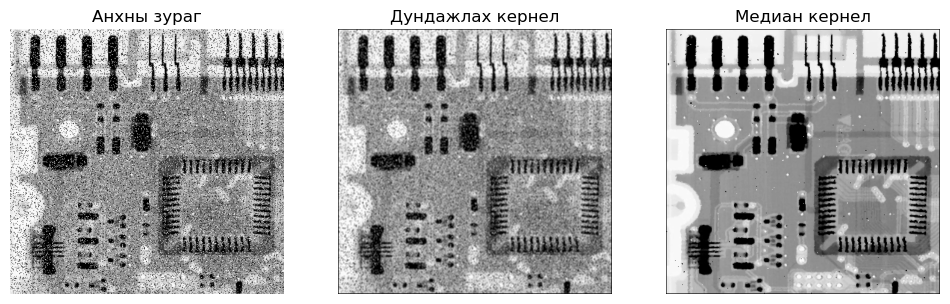

In [18]:
avg_kernel_img = smooth_img(img, 3)
median_kernel_img = median_filter(img, 3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 8))

ax1.imshow(img, cmap = 'gray')
ax1.set_title("Анхны зураг")
ax1.axis('off')

ax2.imshow(avg_kernel_img, cmap = 'gray')
ax2.set_title("Дундажлах кернел")
ax2.axis('off')

ax3.imshow(median_kernel_img, cmap = 'gray')
ax3.set_title("Медиан кернел")
ax3.axis('off');

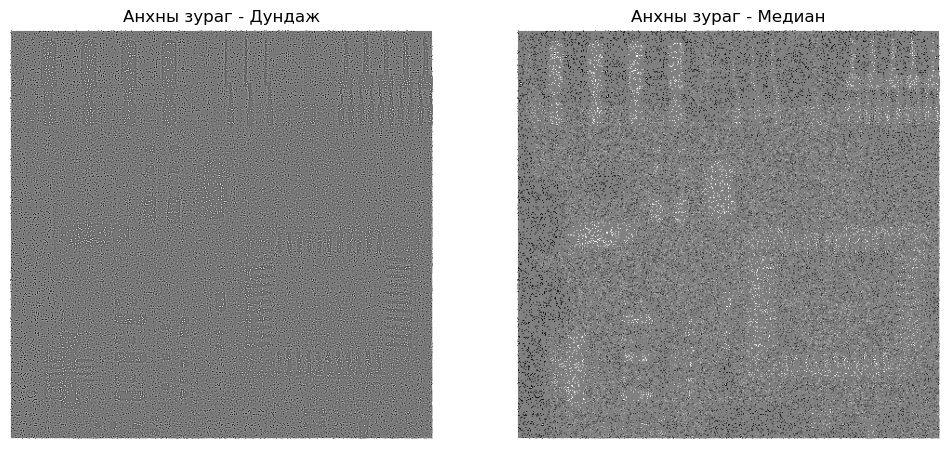

In [23]:
avg_kernel_img_diff = img - avg_kernel_img
med_kernel_img_diff = img - median_kernel_img

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))

ax1.imshow(avg_kernel_img_diff, cmap = 'gray')
ax1.set_title("Анхны зураг - Дундаж")
ax1.axis('off')

ax2.imshow(med_kernel_img_diff, cmap = 'gray')
ax2.set_title("Анхны зураг - Медиан")
ax2.axis('off');